# Probability distributions and their stories (Part 1)

We have seen that we can match data-generating processes with binary outcomes to the story of the binomial distribution:

> The Binomial distribution's story is as follows: the number $r$ of successes in $n$ Bernoulli trials with probability $p$ of success, is Binomially distributed. 

There are many other distributions with stories also! In this notebook, we'll introduce several key distributions and their stories.

For each distribution, we'll introduce

* the story,
* the parameters, and
* how to simulate it (which will include plotting histograms and ECDFs of our simulated data).

We'll then show real-world examples of each distribution, when possible, and demonstrate how to fit the simulated model the empirical data. We'll also occasionally use our simulation skills to give us more insight into the distributions we're introducing, such as to simulate the relationship between the Poisson and Binomial distributions, or to simulate an example of the Central Limit Theorem.

We'll first introduce Poisson distributions and then Gaussian distributions. With the Binomial, Poisson, and Gaussian, you'll already be well-equipped to model a variety of real-world phenomena! We'll then introduce the beta distribution, which is inordinately useful when we need to assign probabilities on unknown probalities (such as when specifying priors).



## Poisson processes and the Poisson distribution

### The Poisson story

In the book [Information Theory, Inference and Learning Algorithms](https://www.amazon.com/Information-Theory-Inference-Learning-Algorithms/dp/0521642981), David MacKay tells the tale of a town called Poissonville, in which the buses have an odd schedule. Standing at a bus stop in Poissonville, the amount of time you have to wait for a bus is totally independent of when the previous bus arrived. This means you could watch a bus drive off and another arrive almost instantaneously, or you could be waiting for hours.

Arrival of buses in Poissonville is what we call a Poisson process. The timing of the next event is completely independent of when the previous event happened. Many real-life processes behave in this way. 

* natural births in a given hospital (there is a well-defined average number of natural births per year, and the timing of one birth is independent of the timing of the previous one);
* Landings on a website;
* Meteor strikes;
* Molecular collisions in a gas;
* Deaths fro mhorse kicks;
* Aviation incidents.

Any process that matches the buses in Poissonville **story** is a Poisson process and the number of arrivals of a Poisson process in a given amount of time is Poisson distributed.

### The parameter(s)

The Poisson distribution has one parameter, the average number of arrivals in a given length of time. So, to match the story, we could consider the number of hits on a website in an hour with an average of six hits per hour. This is Poisson distributed.

### Simulating the Poisson distribution

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize
%matplotlib inline
sns.set()

In [2]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)

    # x-data for the ECDF
    x = np.sort(data)

    # y-data for the ECDF
    y = np.arange(1, n+1) / n

    return x, y

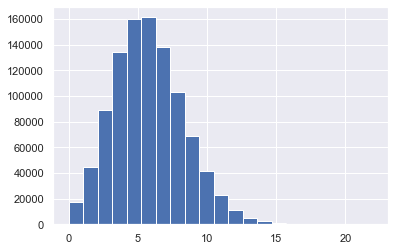

In [3]:
# Generate Poisson-distributed data
rng = np.random.default_rng(42)
samples  =  rng.poisson(6, size=10**6)

# Plot histogram
plt.hist(samples, bins=21);

If this distribution looks familiar, you've got a good eye. The Poisson distribution is related to both the Binomial distribution _and_ the Normal distribution!

In fact, the Poisson distribution is the limit of the Binomial distribution for low probability of success and large number of trials, that is, for rare events. 

To see this, think about the stories. Picture this: you're doing a Bernoulli trial once a  minute for an hour, each with a success probability of 0.05. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 3 successes. This is just like the Poisson story of seeing 3 buses on average arrive in a given interval of time. Thus the Poisson distribution with arrival rate equal to $np$ approximates a Binomial distribution for $n$ Bernoulli trials with probability $p$ of success (with $n$ large and $p$ small). This is useful because the Poisson distribution can be simpler to work with as it has only one parameter instead of two for the Binomial distribution.

### The ECDF for the Poisson distribution

We'll now plot the ECDF of the Poisson-distributed data that we generated above.

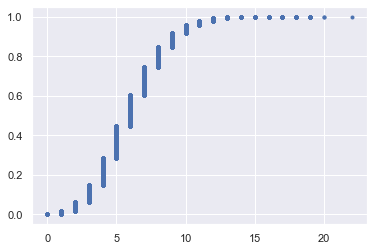

In [4]:
# Generate x- and y-data for the ECDF
x_p, y_p = ecdf(samples)

# Plot the ECDF
plt.plot(x_p, y_p, marker='.', linestyle='none');

### Example: Field goal attempts per game

Let's first remind ourselves of the story behind the Poisson distribution.
> The number of arrivals of a Poisson processes in a given set time interval is Poisson distributed.

To quote Justin Bois, who developed this example [here](https://github.com/justinbois/dataframed-plot-examples/blob/master/lebron_field_goals.ipynb),

> We could model field goal attempts in a basketball game using a Poisson distribution. When a player takes a shot is a largely stochastic process, being influenced by the myriad ebbs and flows of a basketball game. Some players shoot more than others, though, so there is a well-defined rate of shooting. Let's consider LeBron James's field goal attempts for the 2017-2018 NBA season.

First thing's first, the data ([from here](https://www.basketball-reference.com/players/j/jamesle01/gamelog/2018)):

In [5]:
fga = [19, 16, 15, 20, 20, 11, 15, 22, 34, 17, 20, 24, 14, 14, 
       24, 26, 14, 17, 20, 23, 16, 11, 22, 15, 18, 22, 23, 13, 
       18, 15, 23, 22, 23, 18, 17, 22, 17, 15, 23, 8, 16, 25, 
       18, 16, 17, 23, 17, 15, 20, 21, 10, 17, 22, 20, 20, 23, 
       17, 18, 16, 25, 25, 24, 19, 17, 25, 20, 20, 14, 25, 26, 
       29, 19, 16, 19, 18, 26, 24, 21, 14, 20, 29, 16, 9]

To show that this LeBron's attempts are ~ Poisson distributed, you're now going to plot the ECDF and compare it with the the ECDF of the Poisson distribution that has the mean of the data (technically, this is the maximum likelihood estimate).

#### LeBron's ECDF

We first generate the x and y values for the ECDF of LeBron's field attempt goals.

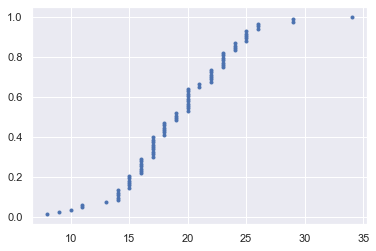

In [6]:
# Generate x & y data for ECDF
x_ecdf, y_ecdf = ecdf(np.array(fga))
# Plot the ECDF
plt.plot(x_ecdf, y_ecdf, marker='.', linestyle='none');

##### The Poisson model for LeBron's field goal attempts

Now we'll draw samples out of a Poisson distribution to get the theoretical ECDF (that is, simulating the model), plot it with the ECDF of the data and see how they look.

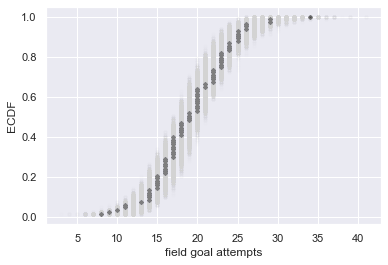

In [7]:
# Number of times we simulate the model
n_reps = 1000

# Plot ECDF of data
plt.plot(x_ecdf, y_ecdf, '.', color='black');

# Plot ECDF of model
for _ in range(n_reps):
    samples = rng.poisson(np.mean(fga), size=len(fga))
    x_theor, y_theor = ecdf(samples)
    plt.plot(x_theor, y_theor, '.', alpha=0.01, color='lightgray');


# Label your axes
plt.xlabel('field goal attempts')
plt.ylabel('ECDF');

You can see from the ECDF that LeBron's field goal attempts per game are approximately Poisson distributed. Note that we are not being super rigorous here and that this is intentional. The goal is not to state that the data is indeed Poisson distributed at the X% significance level, but to give a sense of how real-world data can be matched to probability distributions via their statistical stories. Also note that this is inherently a frequentist approach: we are approximating the Poisson distributions by looking at the long-run frequencies of outcomes, when we simulate. But this is fine, as we're merely using it as visual inspection tool, rather than to draw inferences, and thus Bernoulli's fallacy is irrelevant here.

### Example: Death by horse kick

To show off our new skills, let's look at one of the more infamous examples of a Poisson distribution! In 1898, Ladislaus Bortkiewicz, a Russian economist and statistician, published a book called _The Law of Small Numbers_. It was about Poisson distributions and in it Bortkiewicz showed the number of soldiers kicked to death by horses each year in the French cavalry corps is Poisson distributed. This dataset has stood the test of time and holds up well as an example of Poisson-distributed data. To see this, let's first import the data and check it out (data from [here](https://www.randomservices.org/random/data/HorseKicks.html)):

In [8]:
df = pd.read_csv('../../data/Prussion Horse-Kick Data.csv')
df.head()

,Year,GC,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C14,C15
0,1875,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,1876,2,0,0,0,1,0,0,0,0,0,0,0,1,1
2,1877,2,0,0,0,0,0,1,1,0,0,1,0,2,0
3,1878,1,2,2,1,1,0,0,0,0,0,1,0,1,0
4,1879,0,0,0,1,1,2,2,0,1,0,0,2,1,0


Let's now get it into a form of total number of kicks each year:

In [9]:
df['kicks'] = df.drop(['Year'], axis=1).sum(axis=1)
kicks = df['kicks']
kicks.head()

0     3
1     5
2     7
3     9
4    10
Name: kicks, dtype: int64

We plot the ECDF of the dataset:

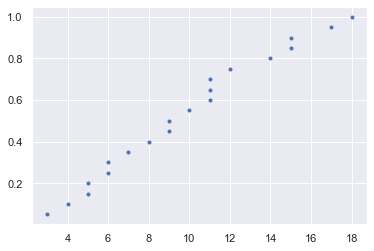

In [10]:
# Generate x & y data for ECDF
x_ecdf, y_ecdf = ecdf(np.array(kicks))
# Plot the ECDF
plt.plot(x_ecdf, y_ecdf, marker='.', linestyle='none');

Now let's simulate the Poisson model and see how our simulation looks, when plotted with the data:

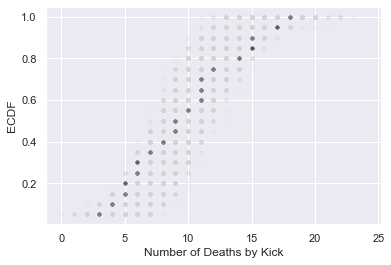

In [11]:
# Number of times we simulate the model
n_reps = 1000

# Plot ECDF of data
plt.plot(x_ecdf, y_ecdf, '.', color='black');

# Plot ECDF of model
for _ in range(n_reps):
    samples = rng.poisson(np.mean(kicks), size=len(kicks))
    x_theor, y_theor = ecdf(samples)
    plt.plot(x_theor, y_theor, '.', alpha=0.01, color='lightgray');


# Label your axes
plt.xlabel('Number of Deaths by Kick')
plt.ylabel('ECDF');

This looks good! The ECDFs are evidence for our data being Poisson distributed and for the process of being kicked to death by a horse being a Poisson process.

### Simulating relationships between distributions: the Poisson and the Binomial

We gave an argument above, along with an example, as to the nature of the relationship between the Poisson and Binomial distributions, in particular that "the Poisson distribution is the limit of the Binomial distribution for low probability of success and large number of trials, that is, for rare events." It is possible to prove this relationship mathematically however such a proof, although rigorous, does not give an intution behind the relationship. To provide this intution, along with the argument and example presented above, it helps to simulate the data-generating process.

Recalling the example,

> [Y]ou're doing a Bernoulli trial once a  minute for an hour, each with a success probability of 0.05. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 3 successes. This is just like the Poisson story of seeing 3 buses on average arrive in a given interval of time,


We simulate it by generating 1,000 instances of doing 60 trials, each with $p=0.05$, and plot the ECDF:

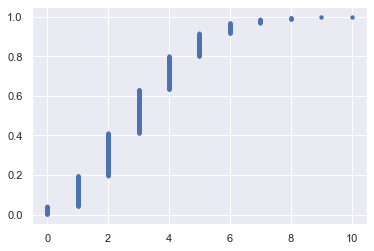

In [12]:
bts = rng.binomial(60, 0.05, 1000)
# Generate x & y data for ECDF
x_ecdf, y_ecdf = ecdf(bts)
# Plot the ECDF
plt.plot(x_ecdf, y_ecdf, marker='.', linestyle='none');

Now we'll draw samples out of a Poisson distribution to get the theoretical ECDF (that is, simulating the model), plot it with the ECDF of the data and see how they look.

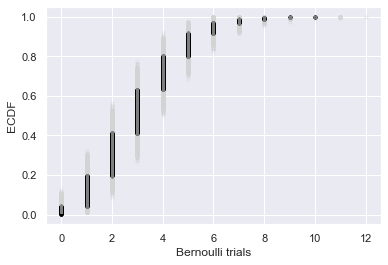

In [13]:
# Number of times we simulate the model
n_reps = 1000

# Plot ECDF of data
plt.plot(x_ecdf, y_ecdf, '.', color='black');

# Plot ECDF of model
for _ in range(n_reps):
    samples = rng.poisson(np.mean(bts), size=len(fga))
    x_theor, y_theor = ecdf(samples)
    plt.plot(x_theor, y_theor, '.', alpha=0.01, color='lightgray');


# Label your axes
plt.xlabel('Bernoulli trials')
plt.ylabel('ECDF');

You can see from the ECDF that the results of the Bernoulli trials are approximately Poisson distributed. Now that we're familiar with both the Binomial and Poisson distributions, let's move on to the Gaussian!


## The Gaussian distribution

### The Gaussian story

The normal distribution, also known as the Gaussian or Bell Curve, appears everywhere, and we will use these terms interchangeably. There are many reasons for it being so widespread. One is the following:

> When doing repeated measurements, we expect them to be normally distributed, owing to the many subprocesses that contribute to a measurement. This is because (a formulation of the Central Limit Theorem) **any quantity that emerges as the sum of a large number of subprocesses tends to be Normally distributed** provided none of the subprocesses is very broadly distributed.




### The parameters

The normal distribution has two parameters, mean $\mu$ and variance $\sigma^2$. The mean, as you may expect, is the expected value (or average) of the distribution, while the variance captures the spread of the distribution.

One useful way to consider them is $\mu$ as a _location_ parameter and $\sigma$ as a _shape_ parameter. What we really mean by this is that changing $\mu$ will essentially translate the distribution along the x-axis, while changing $\sigma^2$ will make the distribution wider or more narrow.

### Simulating the Gaussian


Let's now simulate a Gaussian distribution and plot the resulting histogram:

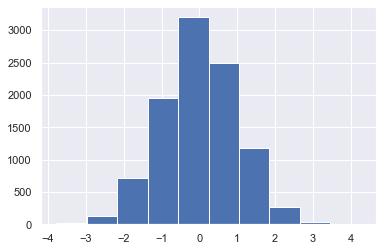

In [14]:
samples = rng.normal(0, 1, size=10000)
plt.hist(samples);

### The ECDF of the Gaussian

Let's also plot the ECDF of the Gaussian data we just simulated:

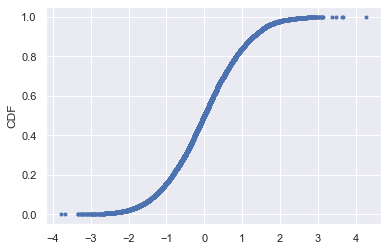

In [15]:
x, y = ecdf(samples)

_ = plt.plot(x, y, marker='.', linestyle='none')

_ = plt.ylabel('CDF')

### An example of a Gaussian distribution: the speed of light

Now it's time to see if this holds for the measurements of the speed of light in the famous Michelson–Morley experiment.

Below, we'll plot the histogram with a Gaussian curve fitted to it. Even if that looks good, though, that could be due to binning bias. So then we'll plot the ECDF of the data and the CDF of the model!

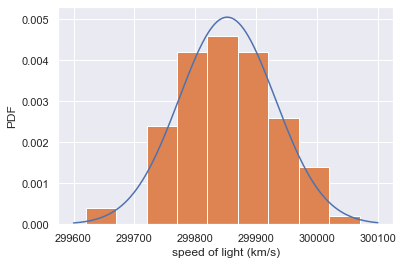

In [16]:
# Load data, plot histogram 
import scipy.stats as st
df = pd.read_csv('../../data/michelson_speed_of_light.csv')
df = df.rename(columns={'velocity of light in air (km/s)': 'c'})
c = df.c.values
x_s = np.linspace(299.6, 300.1, 400) * 1000
plt.plot(x_s, st.norm.pdf(x_s, c.mean(), c.std(ddof=1)))
plt.hist(c, bins=9, density=True)
plt.xlabel('speed of light (km/s)')
plt.ylabel('PDF');

#### Speed of light data and Gaussian model ECDF

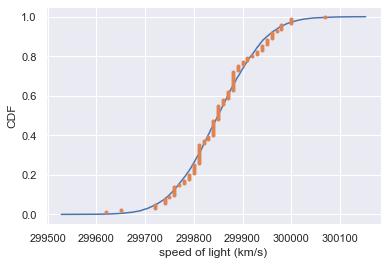

In [17]:
# Get speed of light measurement + mean & standard deviation
michelson_speed_of_light = df.c.values
mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light, ddof=1)

# Generate normal samples w/ mean,  std of data
samples = np.random.normal(mean, std, size=10000)

# Generate data ECDF & model CDF
x, y = ecdf(michelson_speed_of_light)
x_theor, y_theor = ecdf(samples)

# Plot data & model (E)CDFs
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF')

The data looks pretty Gaussian to us! Some of you may ask but is the data really normal? I urge you to check out Allen Downey's post [_Are your data normal? Hint: no._ ](http://allendowney.blogspot.com/2013/08/are-my-data-normal.html)

### The Central limit theorem

Recall that, in Chapter 2, we used the bootstrap to estimate our uncertainty around the mean of the Fortis Finch beak length population:

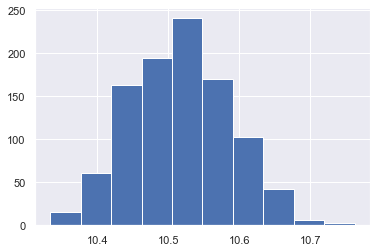

In [18]:
# Import and view head of data
df_12 = pd.read_csv('../../data/finch_beaks_2012.csv')
df_fortis = df_12.loc[df_12['species'] == 'fortis']
blf = df_fortis['blength']

n = 10**3
blf_means = np.zeros(n)

for i in range(n):
    samples = rng.choice(blf, len(blf))
    mean = np.mean(samples)
    blf_means[i] = mean
    
plt.hist(blf_means);

We noted that the distribution looks approximately normal so let's now plot the relevant ECDFs to confirm this:

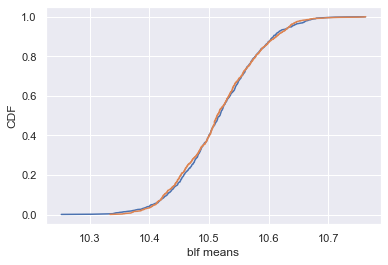

In [19]:
mean = np.mean(blf_means)
std = np.std(blf_means, ddof=1)

# Generate normal samples w/ mean,  std of data
samples = rng.normal(mean, std, size=1000)

# Generate data ECDF & model CDF
x_f, y_f = ecdf(blf_means)
x_theor, y_theor = ecdf(samples)

# Plot data & model (E)CDFs
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x_f, y_f)
_ = plt.xlabel('blf means')
_ = plt.ylabel('CDF')

That looks pretty good! Knowing the story of the normal distribution, why would this distribution be normally distributed? It comes down to the Central limit theorem! Recall that the CLT states that:

> **any quantity that emerges as the sum of a large number of subprocesses tends to be Normally distributed** provided none of the subprocesses is very broadly distributed.

And the mean is proportional to the sum of a large number of subprocesses, each of which is an individual measurement of a beak length. Now we've added the Gaussian distribution to our toolkit, let's wrap up this chapter by diving into the beta distribution, which will help us quantify uncertainty around unknown probabilities.

## Beta distribution

### The beta story

We'll start by telling you the story of the beta distribution, for completeness' sake, but then we'll delve into other ways to get intution for the beta distribution:

> Say you wait for two multistep processes to happen. The individual steps of each process happen at the same rate, but the first multistep process requires α steps and the second requires β steps. The fraction of the total waiting time take by the first process is beta distributed.


This story doesn't really tell us some of the most salient aspects of the beta distribution. The most important aspect is that, using the beta distribution, we can assign probabilities on unknown probalities, such as what is the probability that $P(heads) = 0.5$ for a biased coin. The beta distribution is also defined only on $0≤x≤1$, and x can be thought of as the probability of a Bernoulli trial, for example.

Consider the average CTR of two websites, **A** that was launched several minutes ago and **B** that has been live for some time. What we'd really like to do is to predict the CTR of both A and B but the thing is we have a lot more data on B and so can be more certain of the CTR we have calculated. Let's say that 10 people so far have landed on website A and nobody has clicked through. Would we assume that the CTR is likely zero, then? No, not at all! Why not?

Because we're going in with prior information, namely that a CTR under 10% is quite common and that a CTR of 0% is very unlikely. And it is the beta distribution that allows us to encode this prior information.

### The beta parameters

$\alpha$ and $\beta$, which are both _shape_ parameters. These uniquely define the beta distribution, in accordance with the story of the distribution told above. As we'll see below, when $\alpha=\beta=1$, the beta distribution is equivalent to the uniform distribution and, due the to 2 degrees of freedom, the beta distribution is versatile and widely applicable.


### Simulating the beta distribution


To simulate the beta distribution, we'll need to pick some parameters so let's do it a couple of times.


Let's first simulate $\beta(1, 1)$:

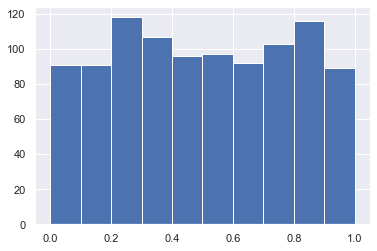

In [20]:
samples_1 = rng.beta(1, 1, 10**3)
plt.hist(samples_1);

It's no coincidence that it looks like the uniform distribution... because it is! This encodes no former knowledge about the CTR, except that it lays between 0 and 1 and all possible values therein are equally likely. One the really cool aspects of the beta distribution is that, as we begin to see results from our experiments, we can update the beta distribution to include these results in an intuitive manner. In particular, if we see $a_0$ Os and $a_1$ 1s, we can update our distribution to $\beta(1+a_1, 1+a_0)$ to encode this additional knowledge. Thus, were we to see 10 people not click through and  2 click-throughs, we would get $\beta(3, 11)$:

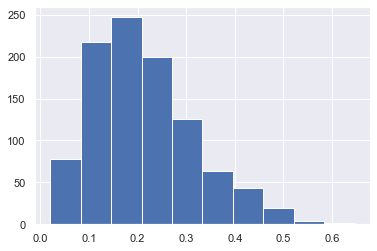

In [21]:
samples_2 = rng.beta(3, 11, 10**3)
plt.hist(samples_2);

### The ECDF of the beta distribution

Let's now plot the ECDFs of these two distributions to get a feel for them:

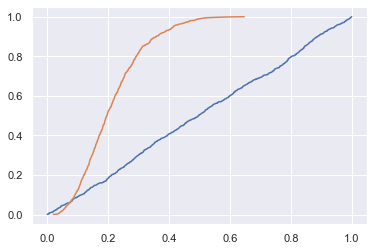

In [22]:
x_1, y_1 = ecdf(samples_1)
x_2, y_2 = ecdf(samples_2)

plt.plot(x_1, y_1);
plt.plot(x_2, y_2);


### Example: baseball batting averages

This is an example from sabermetrics (the mathematical and statistical analysis of baseball records). We'll be looking at average batting rate, which is analogous to the average CTR story above via matching both stories to the binomial distribution! This example is inspired by [several](http://varianceexplained.org/statistics/beta_distribution_and_baseball/) [blog posts](http://varianceexplained.org/r/empirical_bayes_baseball/) by David Robinson.

Let's say we have a batter $A$ with 3 out of 10 hits and a batter $B$ with 250 out of $1000$ hits. $A$'s batting average is 0.3 and $B$'s is 0.25, but we have much less data to go on with $A$!

But we also have a lot more data! In the end, we can use a technique known as _Empirical Bayes_ to get better estimates for the relevant batting averages, which involves two steps:

1. Estimating a beta distribution for all the relevant data
2. Use that distribution to retrieve estimates for each individual (such as $A$ and $B$).

Here, we'll do Step 1 and we'll return to Step 2 after introducing Bayes' Theorem and Bayesian inference. The attentive reader may notice that we're referring to prior and posterior distributions in Steps 1 and 2 without yet using that language.

So let's now import our data, clean it up a bit, and model it as a beta distribution:

In [23]:
df_batting = pd.read_csv('../../data/Batting.csv')
df_p = pd.read_csv('../../data/Pitching.csv')
df_batting.head()

dfg = df_batting[['playerID','AB','H']].groupby(['playerID']).sum()
dfg['Av'] = dfg['H']/dfg['AB']
dfg.reset_index(inplace=True)
dfg.head()

,playerID,AB,H,Av
0,aardsda01,4,0,0.000000
1,aaronha01,12364,3771,0.304998
2,aaronto01,944,216,0.228814
3,aasedo01,5,0,0.000000
4,abadan01,21,2,0.095238


Let's clean up our data a bit by dropping pitchers, include only those with > 500 at bats, and dropping NaNs:

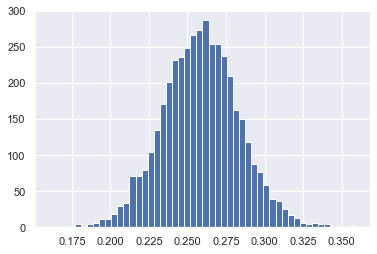

In [24]:
dfg = dfg[~dfg.playerID.isin(df_p.playerID.unique())]

#df = dfg[dfg['Av'] > 0.18]
dfg = dfg[dfg['AB'] > 500]
dfg.dropna(inplace=True)
plt.hist(dfg['Av'],bins=50);

We now fit a beta distribution to the data, simulate from the beta, and plot the resulting histogram:

0.25858687458828294 0.0006178976021790106
79.97509357607375 229.3023734392516


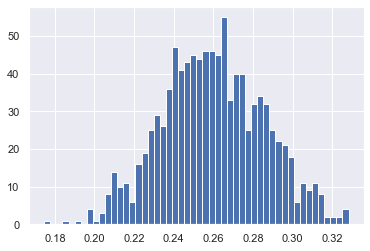

In [25]:
data = dfg['Av']
m = np.mean(data)
v = np.var(data)
print(m, v)
a = m**2*((1-m)/v - 1/m)
b = a*(1/m - 1)
print(a, b)
samples = rng.beta(a, b, 10**3)
plt.hist(samples, bins=50);



We then compute and plot and ECDFs for the data and the simulated model:

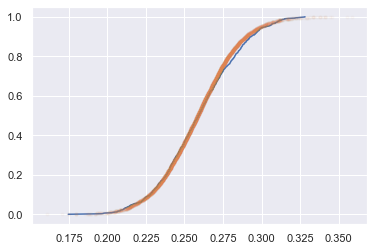

In [26]:
# Compute ECDFs for sample & model
x, y = ecdf(np.array(data))
x_theor, y_theor = ecdf(np.array(samples))
# Plot sample & model ECDFs
plt.plot(x_theor, y_theor);
plt.plot(x, y, marker='.', linestyle='none', alpha=0.03);

We can see that out data is approximately beta distributed, where $\alpha\approx 80$ and $\beta\approx 229.$
After we introduce Bayes' Theorem and Bayesian inference, we'll see how this can be updated to retrieve estimates for individual batters.

## Wrapping up

In this notebook, we have introduced 4 key distributions that will provide a firm foundation for any future statistical modeling. In particular, we have focused on matching distributions to their stories, in order to give intuition for how we think about these distributions and how they correspond to the way we encode the data-generating processes in our modeling choices.

We've seen how many of the datasets are related and used our simulation skills to demonstrate these relationships. We've also looked at a variety of real-world datasets, considered what data-generating processes could have resulted in them, fit the relevant models to the data, and used the ECDF to visualize the data and the model together, in order to get a visual sense of the goodness of fit.